In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

In [2]:
data1 = pd.read_csv('datafile (1).csv')

crop_data=pd.read_csv('Crop_Data.csv')
crop_recommendation=pd.read_csv('Crop_recommendation.csv')
crop_production=pd.read_csv('crop_production.csv')

In [ ]:
!pip install dask

In [3]:
import pandas as pd
import dask.dataframe as dd
import seaborn as sns
import matplotlib.pyplot as plt

# Read data from CSV files with appropriate settings
data1 = dd.read_csv('datafile (1).csv', assume_missing=True)
crop_production = dd.read_csv('crop_production.csv', dtype={'Area': 'float64'}, assume_missing=True)
crop_data = dd.read_csv('Crop_Data.csv', assume_missing=True)

# Rename columns in data1 for consistency
data1 = data1.rename(columns={
    'Crop': 'Crop',  # No change needed here
    'State': 'State_Name',  # Rename to match common column for merging
    'Cost of Cultivation (/Hectare) A2+FL': 'Cost_A2_FL',
    'Cost of Cultivation (/Hectare) C2': 'Cost_C2',
    'Cost of Production (/Quintal) C2': 'Cost_Production',
    'Yield (Quintal/ Hectare) ': 'Yield'
})

# Rename columns in crop_production for consistency
crop_production = crop_production.rename(columns={
    'State': 'State_Name',  # Rename to match the 'data1' and 'crop_data'
    'District': 'District_Name'  # Ensuring consistency for merging
})

# Rename columns in crop_data for consistency
crop_data = crop_data.rename(columns={
    'State': 'State_Name',  # Ensure all state columns match for merging
    'District': 'District_Name',  # Standardize district naming
    'Soil Type': 'Soil_Type',  # Assuming 'Soil' is used in crop_data
    'Fertilizer Usage': 'Fertilizer_Usage',  # Consistent naming for fertilizer usage
    'Pesticide Usage': 'Pesticide_Usage',  # Consistent naming for pesticide usage
    'Rainfall': 'Rainfall',  # Ensure 'Rainfall' is the used term
    'pH': 'pH'  # Assuming 'pH_Level' is used in crop_data
})

# Drop 'Crop' column from data1 as we are using 'Crop' from crop_production
data1 = data1.drop('Crop', axis=1)

# Merge data1 and crop_production based on 'State_Name'
data1 = dd.merge(
    data1,
    crop_production[['State_Name', 'Crop', 'District_Name', 'Area', 'Season']],
    on='State_Name',
    how='left'
)

# Merge additional data from Crop_Data.csv based on 'State_Name', 'District_Name', and 'Crop'
data1 = dd.merge(
    data1,
    crop_data[['State_Name', 'Crop', 'Soil_Type', 'Fertilizer_Usage', 'Pesticide_Usage', 'Rainfall', 'pH','Season']],
    on=['State_Name','Crop','Season'],
    how='left'
)

# Convert the Dask dataframe to a pandas dataframe
data1 = data1.compute()
data1.head().style.set_properties(**{'background-color': 'royalblue', 'color': 'black', 'border-color': '#8b8c8c'})



,State_Name,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield,Crop,District_Name,Area,Season,Soil_Type,Fertilizer_Usage,Pesticide_Usage,Rainfall,pH
0,Uttar Pradesh,9794.050000,23076.740000,1941.550000,9.830000,Arhar/Tur,AGRA,6538.000000,Kharif,,,,nan,
1,Uttar Pradesh,9794.050000,23076.740000,1941.550000,9.830000,Bajra,AGRA,99898.000000,Kharif,,,,nan,
2,Uttar Pradesh,9794.050000,23076.740000,1941.550000,9.830000,Groundnut,AGRA,27.000000,Kharif,Alluvial Soil,High,high,1378.900000,Low
3,Uttar Pradesh,9794.050000,23076.740000,1941.550000,9.830000,Groundnut,AGRA,27.000000,Kharif,Red/Yellow Soil,High,low,322.400000,Average
4,Uttar Pradesh,9794.050000,23076.740000,1941.550000,9.830000,Groundnut,AGRA,27.000000,Kharif,Alluvial Soil,High,high,787.000000,Average


In [4]:
print(f' The dataset contains {data1.shape[1]} columns and {data1.shape[0]} rows')

 The dataset contains 14 columns and 3868935 rows


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3868935 entries, 0 to 3868934
Data columns (total 14 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   State_Name                             string 
 1   Cost of Cultivation (`/Hectare) A2+FL  float64
 2   Cost of Cultivation (`/Hectare) C2     float64
 3   Cost of Production (`/Quintal) C2      float64
 4   Yield                                  float64
 5   Crop                                   string 
 6   District_Name                          string 
 7   Area                                   float64
 8   Season                                 string 
 9   Soil_Type                              string 
 10  Fertilizer_Usage                       string 
 11  Pesticide_Usage                        string 
 12  Rainfall                               float64
 13  pH                                     string 
dtypes: float64(6), string(8)
memory usage: 517.1 MB


In [6]:
print(data1.columns)
print(crop_production.columns)

Index(['State_Name', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield', 'Crop', 'District_Name',
       'Area', 'Season', 'Soil_Type', 'Fertilizer_Usage', 'Pesticide_Usage',
       'Rainfall', 'pH'],
      dtype='object')
Index(['index', 'State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop',
       'Area', 'Production'],
      dtype='object')


In [7]:
data1.isnull().sum().sum()

2795213

In [8]:
data1.isna().sum()/len(data1)*100

,0
State_Name,0.000000
Cost of Cultivation (`/Hectare) A2+FL,0.000000
Cost of Cultivation (`/Hectare) C2,0.000000
Cost of Production (`/Quintal) C2,0.000000
Yield,0.000000
Crop,0.000052
District_Name,0.000052
Area,0.000052
Season,0.000052
Soil_Type,14.449480


In [9]:
# Iterate over columns in the DataFrame
for col in data1.columns:
    # Check if the column has a numeric dtype
    if data1[col].dtype in ['int64', 'float64']:
        # Fill missing values with 0 for numeric columns
        data1[col].fillna(0, inplace=True)
    else:
        # Handle missing values in non-numeric columns (e.g., string columns) differently
        # For example, you could fill them with an empty string:
        data1[col].fillna('', inplace=True)
        # Or, if you want to keep them as NaN:
        # pass  # Do nothing for non-numeric columns

In [10]:
print('The duplicate values in the data is', data1.duplicated().sum())

The duplicate values in the data is 268928


In [11]:
data1.describe().style.background_gradient(cmap='viridis')

,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield,Area,Rainfall
count,3868935.000000,3868935.000000,3868935.000000,3868935.000000,3868935.000000,3868935.000000
mean,19688.688175,30778.258867,1612.432455,109.853579,32269.093900,1177.115858
std,13151.142754,19453.124879,1188.353685,254.135995,63949.708786,935.687263
min,5483.540000,7868.640000,85.790000,1.320000,0.000000,0.000000
25%,12774.410000,19551.900000,732.620000,9.830000,251.000000,616.300000
50%,14715.270000,23076.740000,1559.040000,13.570000,3000.000000,992.800000
75%,23711.440000,33046.120000,2179.260000,36.610000,33719.000000,1505.000000
max,66335.060000,91442.630000,5777.480000,1015.450000,8580100.000000,6331.100000


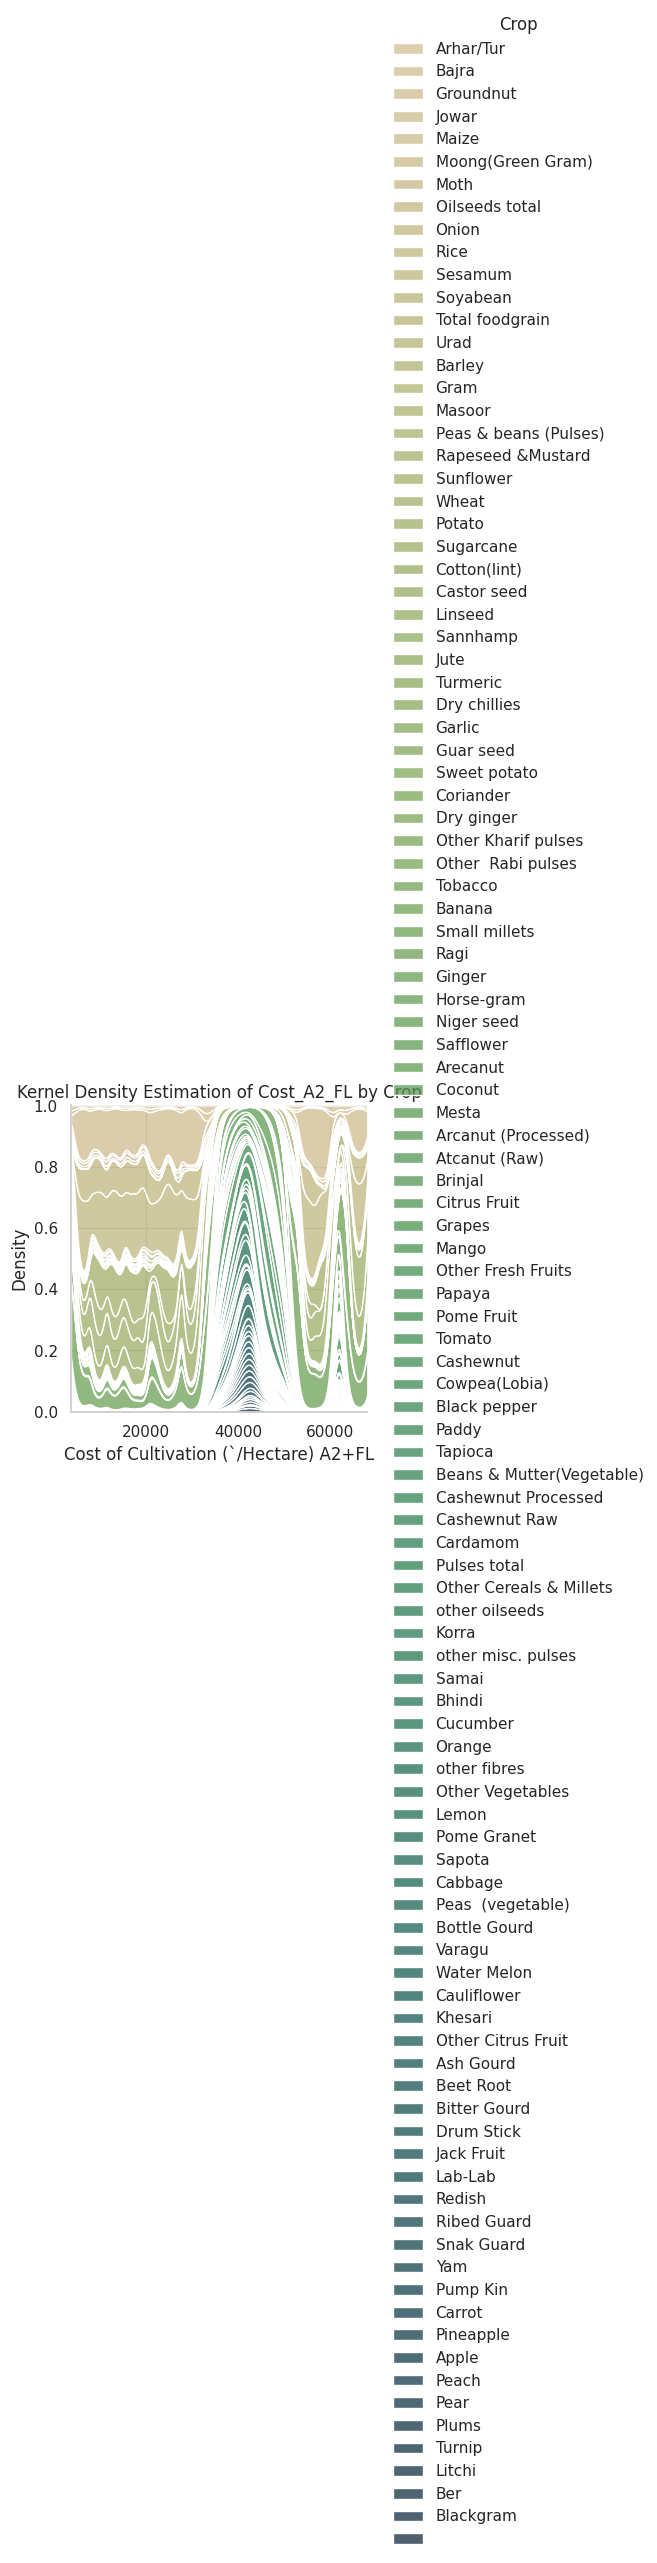

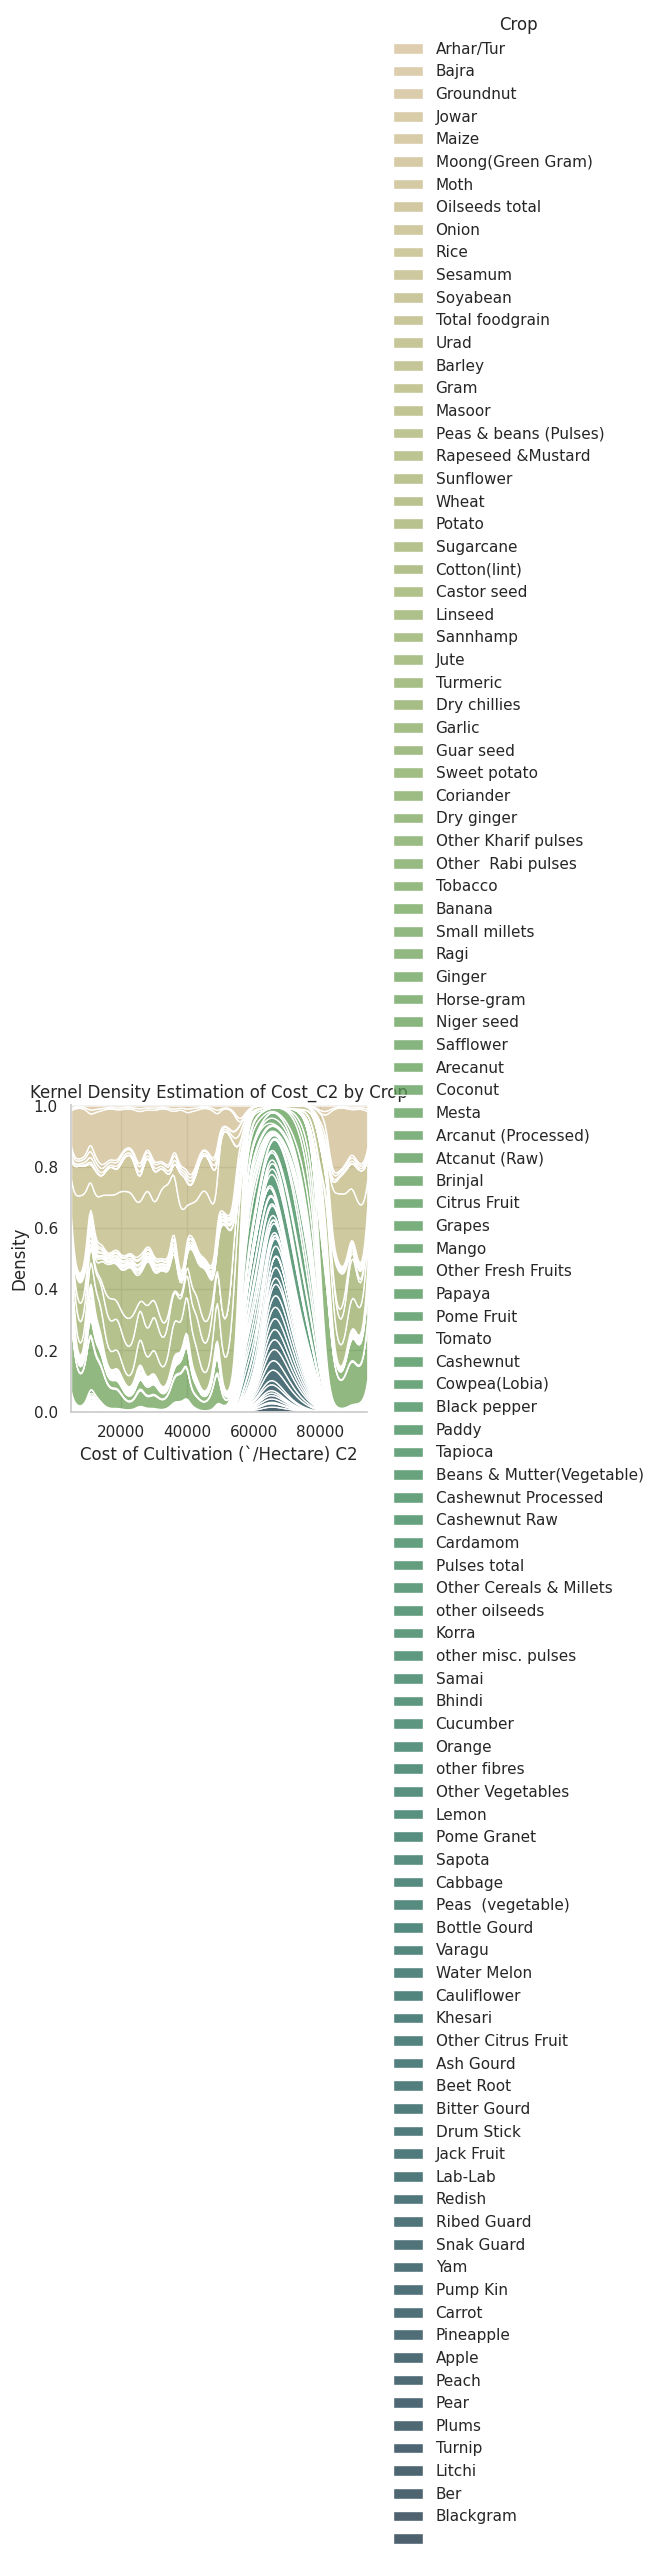

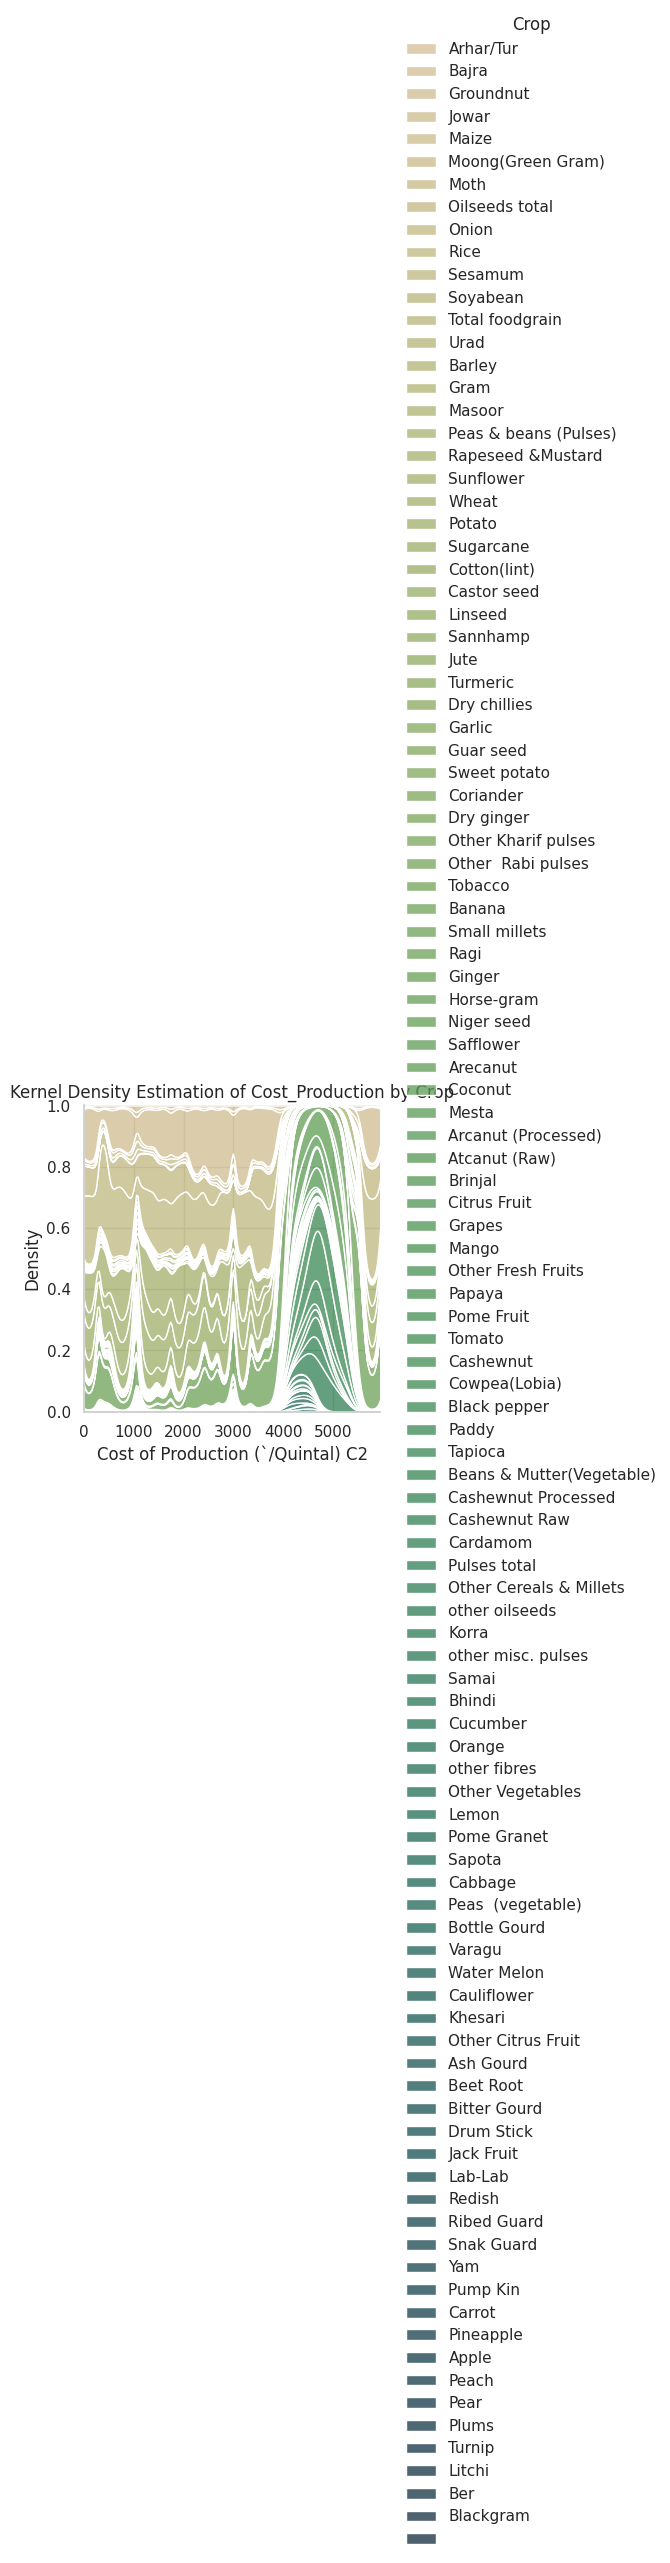

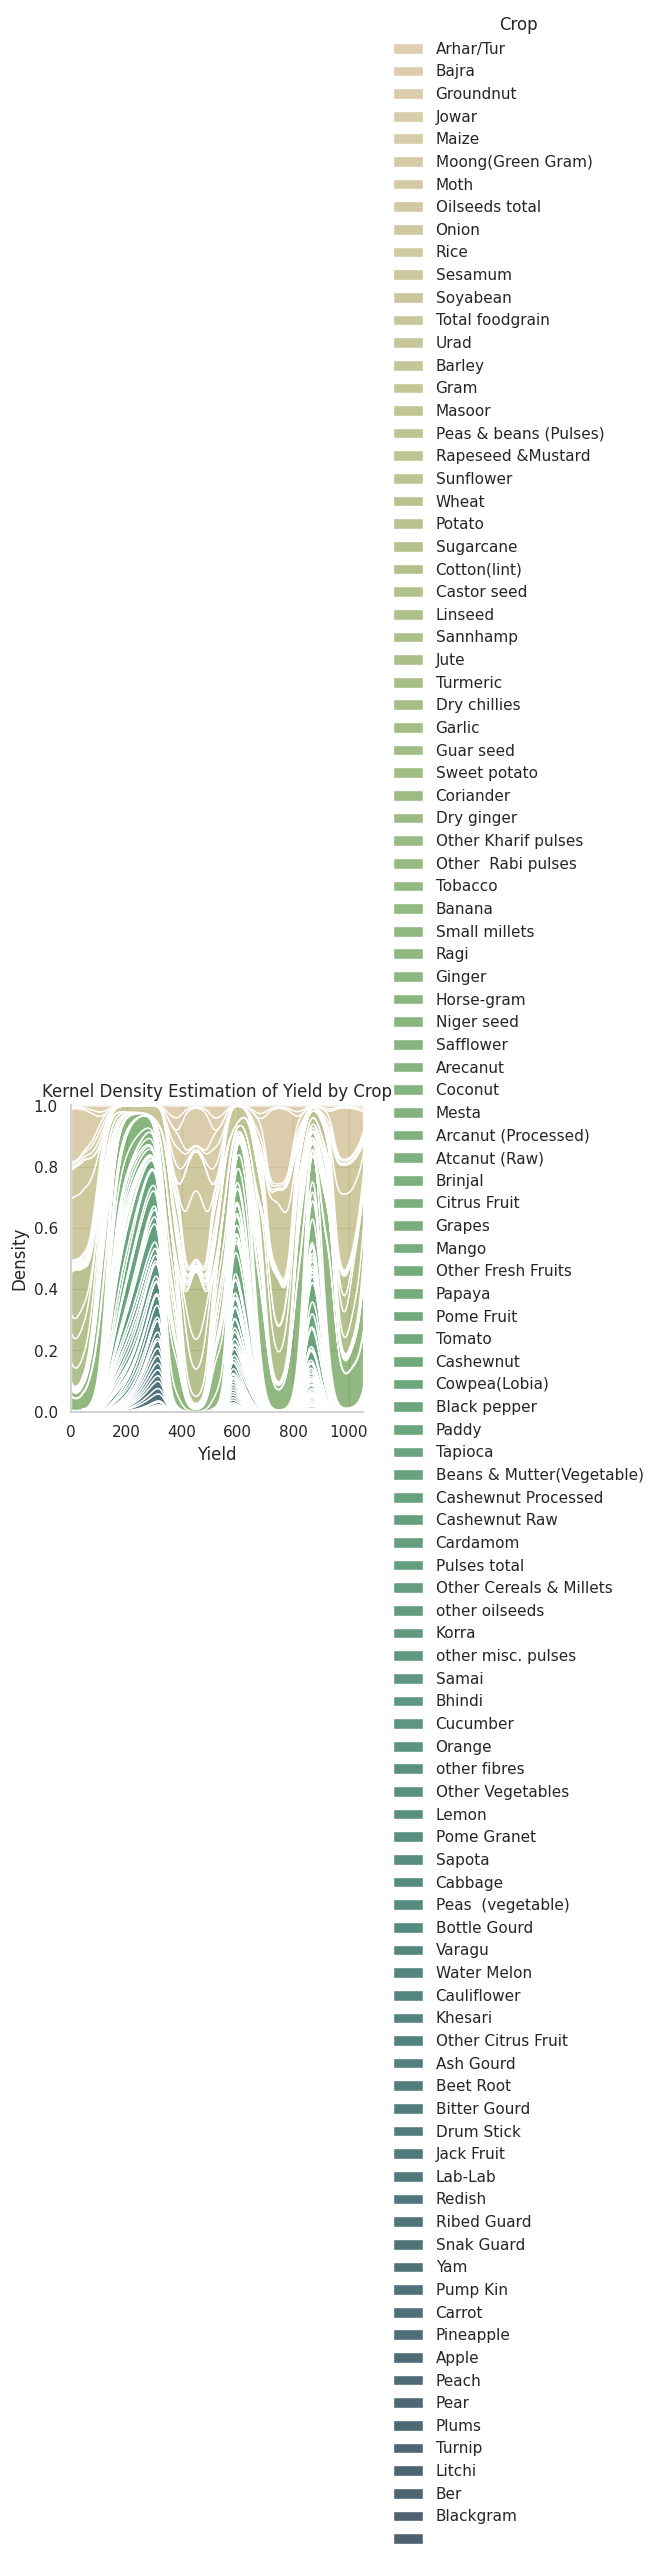

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Corrected column names
cost_a2_fl_col = 'Cost of Cultivation (`/Hectare) A2+FL'
cost_c2_col = 'Cost of Cultivation (`/Hectare) C2'
cost_production_col = 'Cost of Production (`/Quintal) C2'
yield_col = 'Yield'
crop_col = 'Crop'

# Plotting 'Cost_A2_FL'
sns.displot(data=data1, x=cost_a2_fl_col, hue=crop_col, kind="kde", height=4, multiple="fill", clip=(0, None), palette="ch:rot=-.75,hue=1,light=.75")
plt.title('Kernel Density Estimation of Cost_A2_FL by Crop')
plt.xlabel(cost_a2_fl_col)
plt.ylabel('Density')
plt.show()

# Plotting 'Cost_C2'
sns.displot(data=data1, x=cost_c2_col, hue=crop_col, kind="kde", height=4, multiple="fill", clip=(0, None), palette="ch:rot=-.75,hue=1,light=.75")
plt.title('Kernel Density Estimation of Cost_C2 by Crop')
plt.xlabel(cost_c2_col)
plt.ylabel('Density')
plt.show()

# Plotting 'Cost_Production'
sns.displot(data=data1, x=cost_production_col, hue=crop_col, kind="kde", height=4, multiple="fill", clip=(0, None), palette="ch:rot=-.75,hue=1,light=.75")
plt.title('Kernel Density Estimation of Cost_Production by Crop')
plt.xlabel(cost_production_col)
plt.ylabel('Density')
plt.show()

# Plotting 'Yield'
sns.displot(data=data1, x=yield_col, hue=crop_col, kind="kde", height=4, multiple="fill", clip=(0, None), palette="ch:rot=-.75,hue=1,light=.75")
plt.title('Kernel Density Estimation of Yield by Crop')
plt.xlabel(yield_col)
plt.ylabel('Density')
plt.show()


<Axes: >

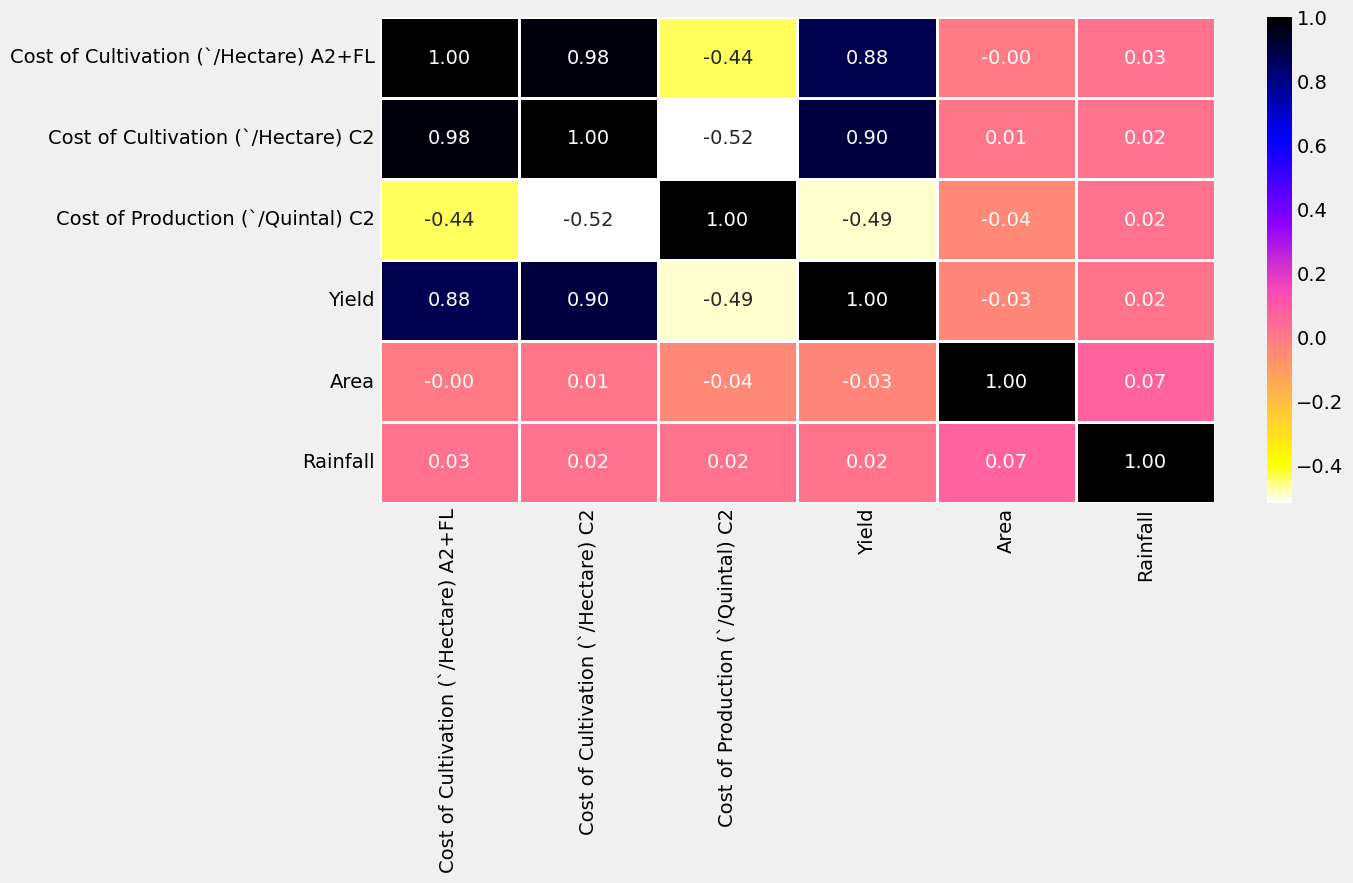

In [12]:
# Select only numerical columns before calculating correlation
numerical_data = data1.select_dtypes(include=['number'])

sns.heatmap(numerical_data.corr(), annot=True, cmap='gnuplot2_r', fmt='.2f', linewidths=1)

DATA ANALYSIS AND VISUALIZATION

**TOP 10 PRODUCER OF WHEAT**


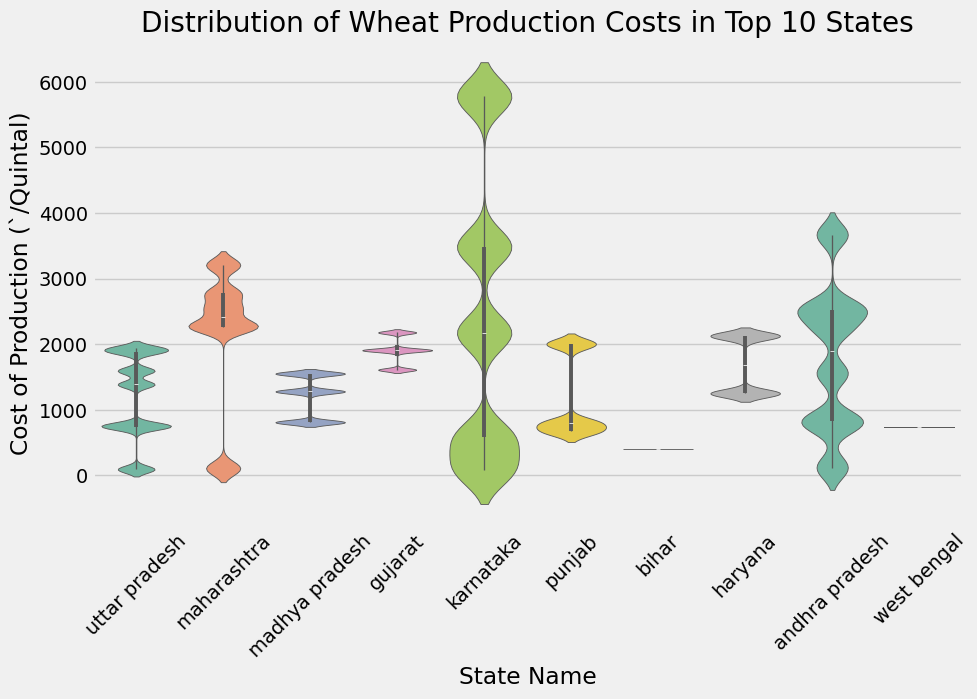

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data1' is already loaded and has the relevant data
# Filter the data for wheat, ignoring case
wheat = data1[data1['Crop'].str.upper() == 'WHEAT']  # Convert to uppercase for case-insensitive matching

# Get the top 10 wheat-producing states
top_states = wheat['State_Name'].value_counts().head(10).index
wheat_top_states = wheat[wheat['State_Name'].isin(top_states)]

# Check if wheat_top_states is empty and provide feedback
if wheat_top_states.empty:
    print("No data found for wheat production in the top 10 states. Check your data and filters.")
else:
    # Generate the violin plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='State_Name', y='Cost of Production (`/Quintal) C2', data=wheat_top_states,
                   order=top_states, palette='Set2')

    plt.title('Distribution of Wheat Production Costs in Top 10 States')
    plt.xticks(rotation=45)
    plt.xlabel('State Name')
    plt.ylabel('Cost of Production (`/Quintal)')
    plt.show()


**TOP 10 PRODUCER OF JOWAR**


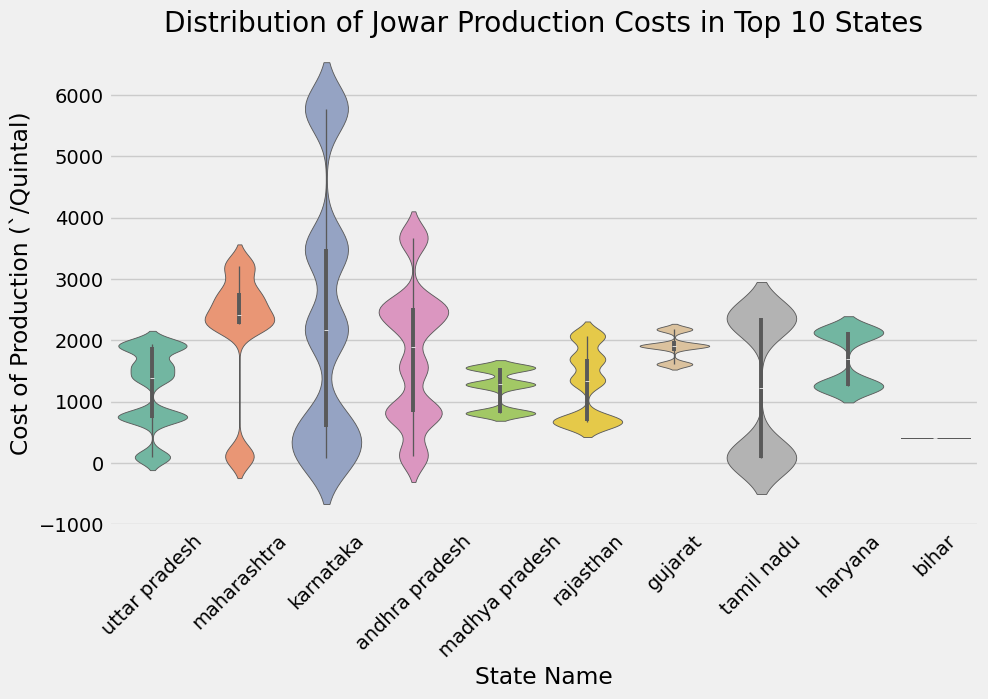

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for Jowar, ignoring case
jowar = data1[data1['Crop'].str.upper() == 'JOWAR']  # Convert to uppercase for case-insensitive matching

# Get the top 10 Jowar-producing states
top_states = jowar['State_Name'].value_counts().head(10).index
jowar_top_states = jowar[jowar['State_Name'].isin(top_states)]

# Check if jowar_top_states is empty and provide feedback
if jowar_top_states.empty:
    print("No data found for Jowar production in the top 10 states. Check your data and filters.")
else:
    # Generate the violin plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='State_Name', y='Cost of Production (`/Quintal) C2', data=jowar_top_states,
                   order=top_states, palette='Set2')

    plt.title('Distribution of Jowar Production Costs in Top 10 States')
    plt.xticks(rotation=45)
    plt.xlabel('State Name')
    plt.ylabel('Cost of Production (`/Quintal)')
    plt.show()


**TOP 10 PRODUCER OF RICE**

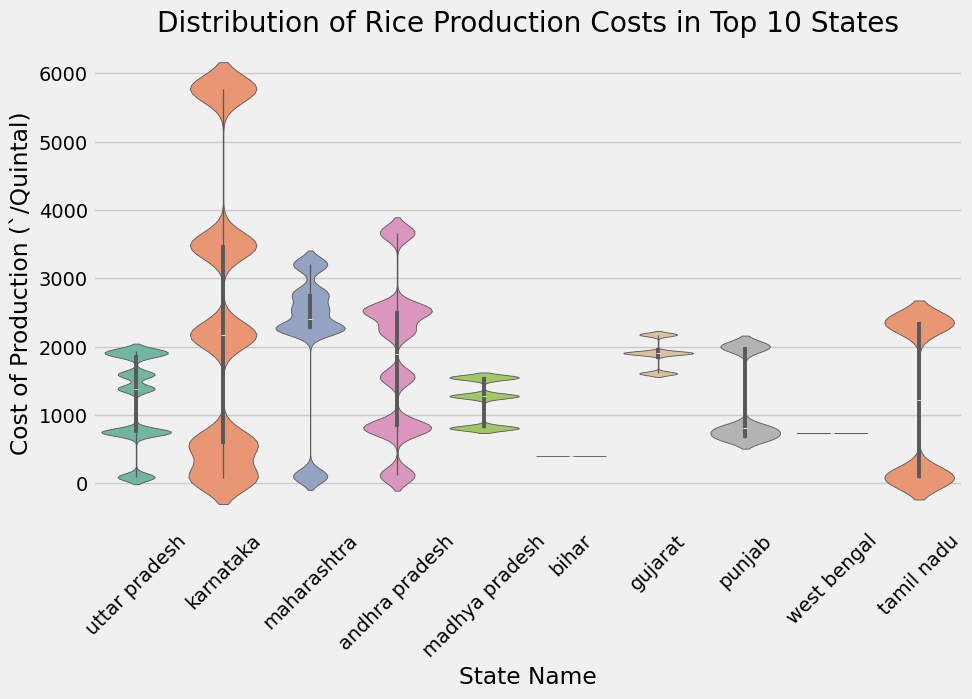

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for Rice, ignoring case
rice = data1[data1['Crop'].str.upper() == 'RICE']  # Convert to uppercase for case-insensitive matching

# Get the top 10 Rice-producing states
top_states = rice['State_Name'].value_counts().head(10).index
rice_top_states = rice[rice['State_Name'].isin(top_states)]

# Check if rice_top_states is empty and provide feedback
if rice_top_states.empty:
    print("No data found for Rice production in the top 10 states. Check your data and filters.")
else:
    # Generate the violin plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='State_Name', y='Cost of Production (`/Quintal) C2', data=rice_top_states,
                   order=top_states, palette='Set2')

    plt.title('Distribution of Rice Production Costs in Top 10 States')
    plt.xticks(rotation=45)
    plt.xlabel('State Name')
    plt.ylabel('Cost of Production (`/Quintal)')
    plt.show()


STATE AND DISTRICT SUMMARY ANALYSIS:

In [28]:
# prompt: to identify uniique state and distrct name in form of json

import json

# Extract unique state and district names
unique_states = data1['State_Name'].unique()
unique_districts = data1['District_Name'].unique()

# Create a dictionary to store the data
state_district_dict = {}
for state in unique_states:
  state_district_dict[state] = list(data1[data1['State_Name'] == state]['District_Name'].unique())

# Convert the dictionary to JSON
json_data = json.dumps(state_district_dict, indent=4)

# Print the JSON data
print(json_data)


{
    "uttar pradesh": [
        "agra",
        "aligarh",
        "allahabad",
        "ambedkar nagar",
        "amethi",
        "amroha",
        "auraiya",
        "azamgarh",
        "baghpat",
        "bahraich",
        "ballia",
        "balrampur",
        "banda",
        "barabanki",
        "bareilly",
        "basti",
        "bijnor",
        "budaun",
        "bulandshahr",
        "chandauli",
        "chitrakoot",
        "deoria",
        "etah",
        "etawah",
        "faizabad",
        "farrukhabad",
        "fatehpur",
        "firozabad",
        "gautam buddha nagar",
        "ghaziabad",
        "ghazipur",
        "gonda",
        "gorakhpur",
        "hamirpur",
        "hapur",
        "hardoi",
        "hathras",
        "jalaun",
        "jaunpur",
        "jhansi",
        "kannauj",
        "kanpur dehat",
        "kanpur nagar",
        "kasganj",
        "kaushambi",
        "kheri",
        "kushi nagar",
        "lalitpur",
        "lucknow",
  

       Cost of Cultivation (`/Hectare) A2+FL  \
count                           3.868935e+06   
mean                            1.968869e+04   
std                             1.315114e+04   
min                             5.483540e+03   
25%                             1.277441e+04   
50%                             1.471527e+04   
75%                             2.371144e+04   
max                             6.633506e+04   

       Cost of Cultivation (`/Hectare) C2  Cost of Production (`/Quintal) C2  \
count                        3.868935e+06                       3.868935e+06   
mean                         3.077826e+04                       1.612432e+03   
std                          1.945312e+04                       1.188354e+03   
min                          7.868640e+03                       8.579000e+01   
25%                          1.955190e+04                       7.326200e+02   
50%                          2.307674e+04                       1.559040e+03   
75%    

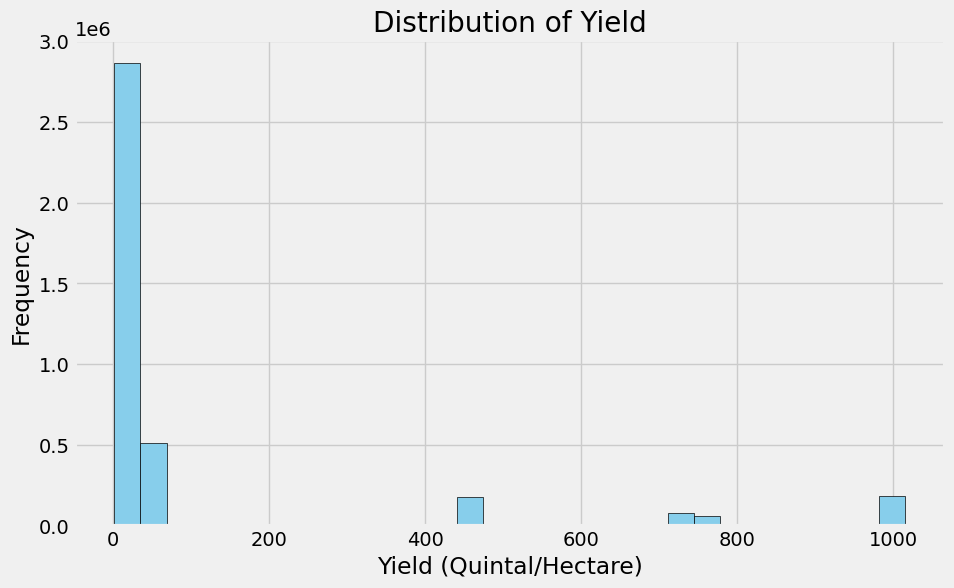

In [29]:
summary_stats = data1.describe()
print(summary_stats)

# Distribution of 'Yield'
plt.figure(figsize=(10, 6))
plt.hist(data1['Yield'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Yield')
plt.xlabel('Yield (Quintal/Hectare)')
plt.ylabel('Frequency')
plt.show()

CROP RECOMMENDATION AND SELECTION BASED ON STATE_NAME,DISTRICT_NAME:


In [30]:
def filter_data_by_region(data):
    """
    Filter data for a specific state and district (case-insensitive) and provide summary statistics.
    """
    # Get user input for state and district names
    state_name = input("Enter the state name: ").strip().lower()
    district_name = input("Enter the district name: ").strip().lower()

    # Convert State_Name and District_Name columns to lower case for case-insensitive comparison
    data['State_Name'] = data['State_Name'].str.lower()
    data['District_Name'] = data['District_Name'].str.lower()

    # Filter data for the specific state and district
    filtered_data = data[(data['State_Name'] == state_name) & (data['District_Name'] == district_name)]

    if filtered_data.empty:
        print(f"No data available for State: {state_name.title()} and District: {district_name.title()}.")
        return None

    print(f"Data available for State: {state_name.title()} and District: {district_name.title()}.")

    # Display summary statistics for the filtered data
    print("\nSummary Statistics:")
    print(filtered_data.describe())

    return filtered_data

# Example usage: call the function to filter and analyze the data
filtered_data = filter_data_by_region(data1)

Enter the state name: tamil nadu
Enter the district name: thiruvallur
Data available for State: Tamil Nadu and District: Thiruvallur.

Summary Statistics:
       Cost of Cultivation (`/Hectare) A2+FL  \
count                            3766.000000   
mean                            44421.460000   
std                             21916.509979   
min                             22507.860000   
25%                             22507.860000   
50%                             44421.460000   
75%                             66335.060000   
max                             66335.060000   

       Cost of Cultivation (`/Hectare) C2  Cost of Production (`/Quintal) C2  \
count                         3766.000000                        3766.000000   
mean                         59709.465000                        1221.895000   
std                          29319.697943                        1136.255867   
min                          30393.660000                          85.790000   
25%         


Outliers Detected:
Cost of Cultivation (`/Hectare) A2+FL      0
Cost of Cultivation (`/Hectare) C2         0
Cost of Production (`/Quintal) C2          0
Yield                                      0
Area                                     694
Rainfall                                  60
dtype: int64


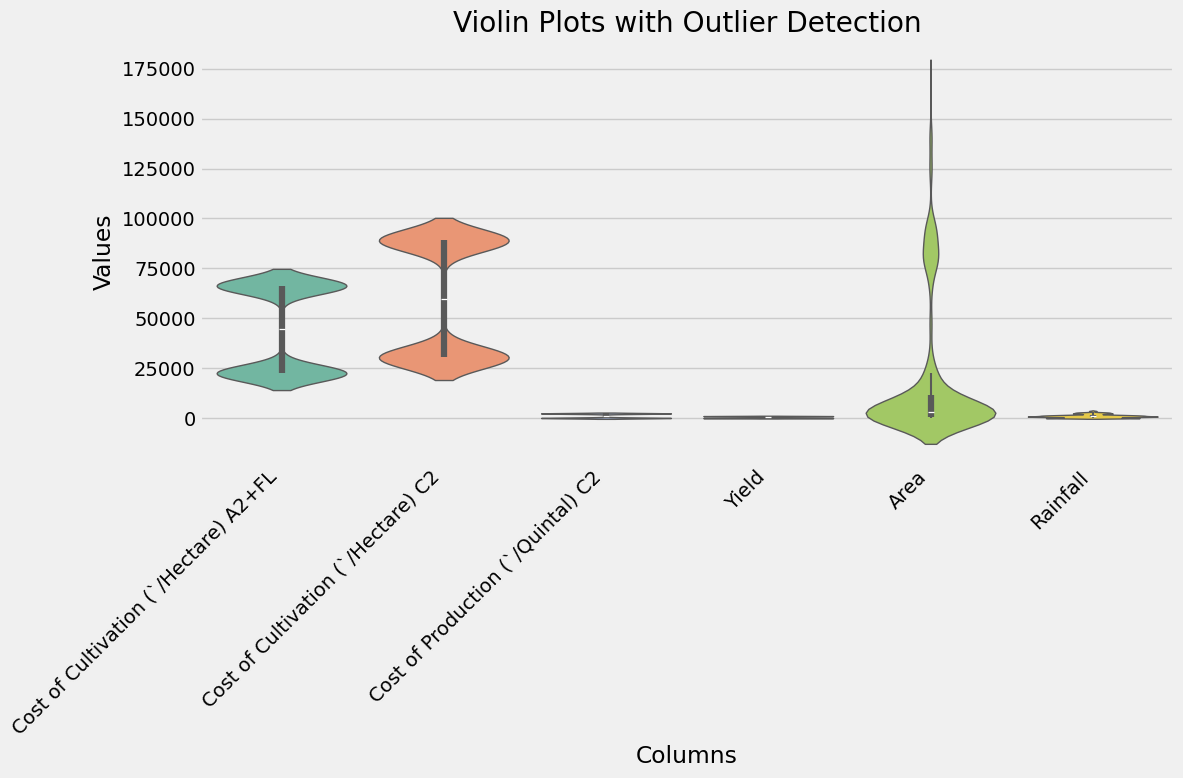

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better color palettes

def visualize_and_detect_outliers(filtered_data, color_palette="deep"):
    """
    Generate violin plots for each column in the filtered data, detect outliers,
    and display the results with an attractive design and different colors.

    Args:
        filtered_data (pandas.DataFrame): The filtered data to visualize.
        color_palette (str, optional): The color palette to use for the violin plots.
            Defaults to "deep" (from seaborn). Other options include "bright",
            "pastel", "muted", or a custom list of colors.
    """

    if filtered_data is None:
        print("No data to visualize.")
        return

    # Select only numerical columns for violin plot
    numerical_data = filtered_data.select_dtypes(include=["number"])

    # Generate violin plots with customization
    plt.figure(figsize=(12, 8))  # Set figure size

    # Use seaborn's violinplot function with custom aesthetics
    # Remove showmeans, quantiles arguments as they are not supported by the underlying matplotlib function
    sns.violinplot(
        data=numerical_data,
        palette=color_palette,  # Set color palette
        linewidth=1,  # Adjust line width for better visibility
    )

    # Customize x-axis labels and layout
    plt.xticks(rotation=45, ha="right")  # Rotate and align x-axis labels
    plt.xlabel("Columns")
    plt.ylabel("Values")
    plt.title("Violin Plots with Outlier Detection")
    plt.tight_layout()

    # Detect outliers using the interquartile range (IQR) method
    Q1 = numerical_data.quantile(0.25)
    Q3 = numerical_data.quantile(0.75)
    IQR = Q3 - Q1

    outliers = ((numerical_data < (Q1 - 1.5 * IQR)) | (numerical_data > (Q3 + 1.5 * IQR))).sum()

    print("\nOutliers Detected:")
    print(outliers)

    plt.show()



# Example usage with different color palettes:
visualize_and_detect_outliers(filtered_data, color_palette="Set2")  # Pastel shades
  # Custom vibrant colors

In [32]:
import numpy as np

# Correct the column name if necessary
cost_column_name = 'Cost of Production (`/Quintal) C2'

# Calculate profit margin using np.divide, handling division by zero
filtered_data['Profit_Margin'] = np.divide(
    filtered_data['Yield'],
    filtered_data[cost_column_name],
    out=np.zeros_like(filtered_data['Yield']),
    where=filtered_data[cost_column_name] != 0
)


In [33]:
import pandas as pd

def recommend_crop(filtered_data):
    """
    Recommends the most profitable crop based on yield and cost of production.

    Args:
        filtered_data (pd.DataFrame): DataFrame containing crop data with columns 'Crop', 'Yield', and 'Cost of Production (`/Quintal) C2'.

    Returns:
        None: Prints the recommended crop and cost analysis.
    """
    if filtered_data is None or filtered_data.empty:
        print("No data to recommend crops.")
        return

    # Check if required columns exist
    required_columns = {'Crop', 'Yield', 'Cost of Production (`/Quintal) C2'}
    if not required_columns.issubset(filtered_data.columns):
        print("Data does not contain required columns.")
        return

    # Rename columns for easier access
    filtered_data = filtered_data.rename(columns={
        'Cost of Production (`/Quintal) C2': 'Cost_Production',
        'Yield': 'Yield'
    })

    # Calculate profit margin (Yield/Cost_Production)
    filtered_data['Profit_Margin'] = filtered_data['Yield'] / filtered_data['Cost_Production']

    # Find the crop with the highest profit margin
    best_crop = filtered_data.loc[filtered_data['Profit_Margin'].idxmax()]

    print("\nRecommended Crop:")
    print(f"Crop: {best_crop['Crop']}")
    print(f"Profit Margin: {best_crop['Profit_Margin']:.2f}")

    # Analyze minimum and maximum costs for the recommended crop
    crop_data = filtered_data[filtered_data['Crop'] == best_crop['Crop']]
    min_cost = crop_data['Cost_Production'].min()
    max_cost = crop_data['Cost_Production'].max()

    print("\nCost Analysis for Recommended Crop:")
    print(f"Minimum Cost of Production: {min_cost:.2f}")
    print(f"Maximum Cost of Production: {max_cost:.2f}")

# Example usage: call the function to recommend a crop
recommend_crop(filtered_data)



Recommended Crop:
Crop: Banana
Profit Margin: 11.84

Cost Analysis for Recommended Crop:
Minimum Cost of Production: 85.79
Maximum Cost of Production: 2358.00


In [34]:
print(filtered_data.columns)


Index(['State_Name', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield', 'Crop', 'District_Name',
       'Area', 'Season', 'Soil_Type', 'Fertilizer_Usage', 'Pesticide_Usage',
       'Rainfall', 'pH', 'Profit_Margin'],
      dtype='object')


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def recommend_crop(filtered_data):
    """
    Recommends the most profitable crop using a Random Forest classifier.
    """

    if filtered_data is None or filtered_data.empty:
        print("No data to recommend crops.")
        return

    # Ensure numeric data types for relevant columns
    numeric_columns = ['Yield', 'Cost of Production (`/Quintal) C2', 'Rainfall']
    categorical_columns = ['Fertilizer_Usage', 'Soil_Type', 'Pesticide_Usage', 'pH']

    # Convert columns to numeric, handle missing values
    for col in numeric_columns:
        filtered_data[col] = pd.to_numeric(filtered_data[col], errors='coerce')

    # Calculate Profit_Margin
    filtered_data['Profit_Margin'] = np.divide(
        filtered_data['Yield'],
        filtered_data['Cost of Production (`/Quintal) C2'],
        out=np.zeros_like(filtered_data['Yield']),
        where=filtered_data['Cost of Production (`/Quintal) C2'] != 0
    )

    # Handle potential errors and edge cases
    if filtered_data['Profit_Margin'].isnull().all():
        print("Unable to calculate profit margin. Check for missing or invalid data in relevant columns.")
        return

    # Prepare data for machine learning
    X = filtered_data[numeric_columns + categorical_columns]
    y = filtered_data['Crop']

    # Impute missing values for numeric columns
    numeric_transformer = SimpleImputer(strategy='mean')

    # Encode categorical columns
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Create preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_columns),
            ('cat', categorical_transformer, categorical_columns)
        ]
    )

    # Create and train the Random Forest classifier pipeline
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ])

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict the best crop
    predicted_crop = model.predict(X_test)[0]

    # Evaluate the model's accuracy
    accuracy = accuracy_score(y_test, model.predict(X_test))

    print("\nRecommended Crop:")
    print(f"Crop: {predicted_crop}")
    print(f"Predicted Accuracy: {accuracy:.2f}")

    # Analyze minimum and maximum costs for the recommended crop
    crop_data = filtered_data[filtered_data['Crop'] == predicted_crop]
    min_cost = crop_data['Cost of Production (`/Quintal) C2'].min()
    max_cost = crop_data['Cost of Production (`/Quintal) C2'].max()

    print("\nCost Analysis for Recommended Crop:")
    print(f"Minimum Cost of Production: {min_cost:.2f}")
    print(f"Maximum Cost of Production: {max_cost:.2f}")

    # Print Profit Margin statistics
    print("\nProfit Margin Statistics for Recommended Crop:")
    print(f"Average Profit Margin: {crop_data['Profit_Margin'].mean():.2f}")
    print(f"Standard Deviation of Profit Margin: {crop_data['Profit_Margin'].std():.2f}")

# Example usage: call the function to recommend a crop
recommend_crop(filtered_data)



Recommended Crop:
Crop: Groundnut
Predicted Accuracy: 0.82

Cost Analysis for Recommended Crop:
Minimum Cost of Production: 85.79
Maximum Cost of Production: 2358.00

Profit Margin Statistics for Recommended Crop:
Average Profit Margin: 5.92
Standard Deviation of Profit Margin: 5.92


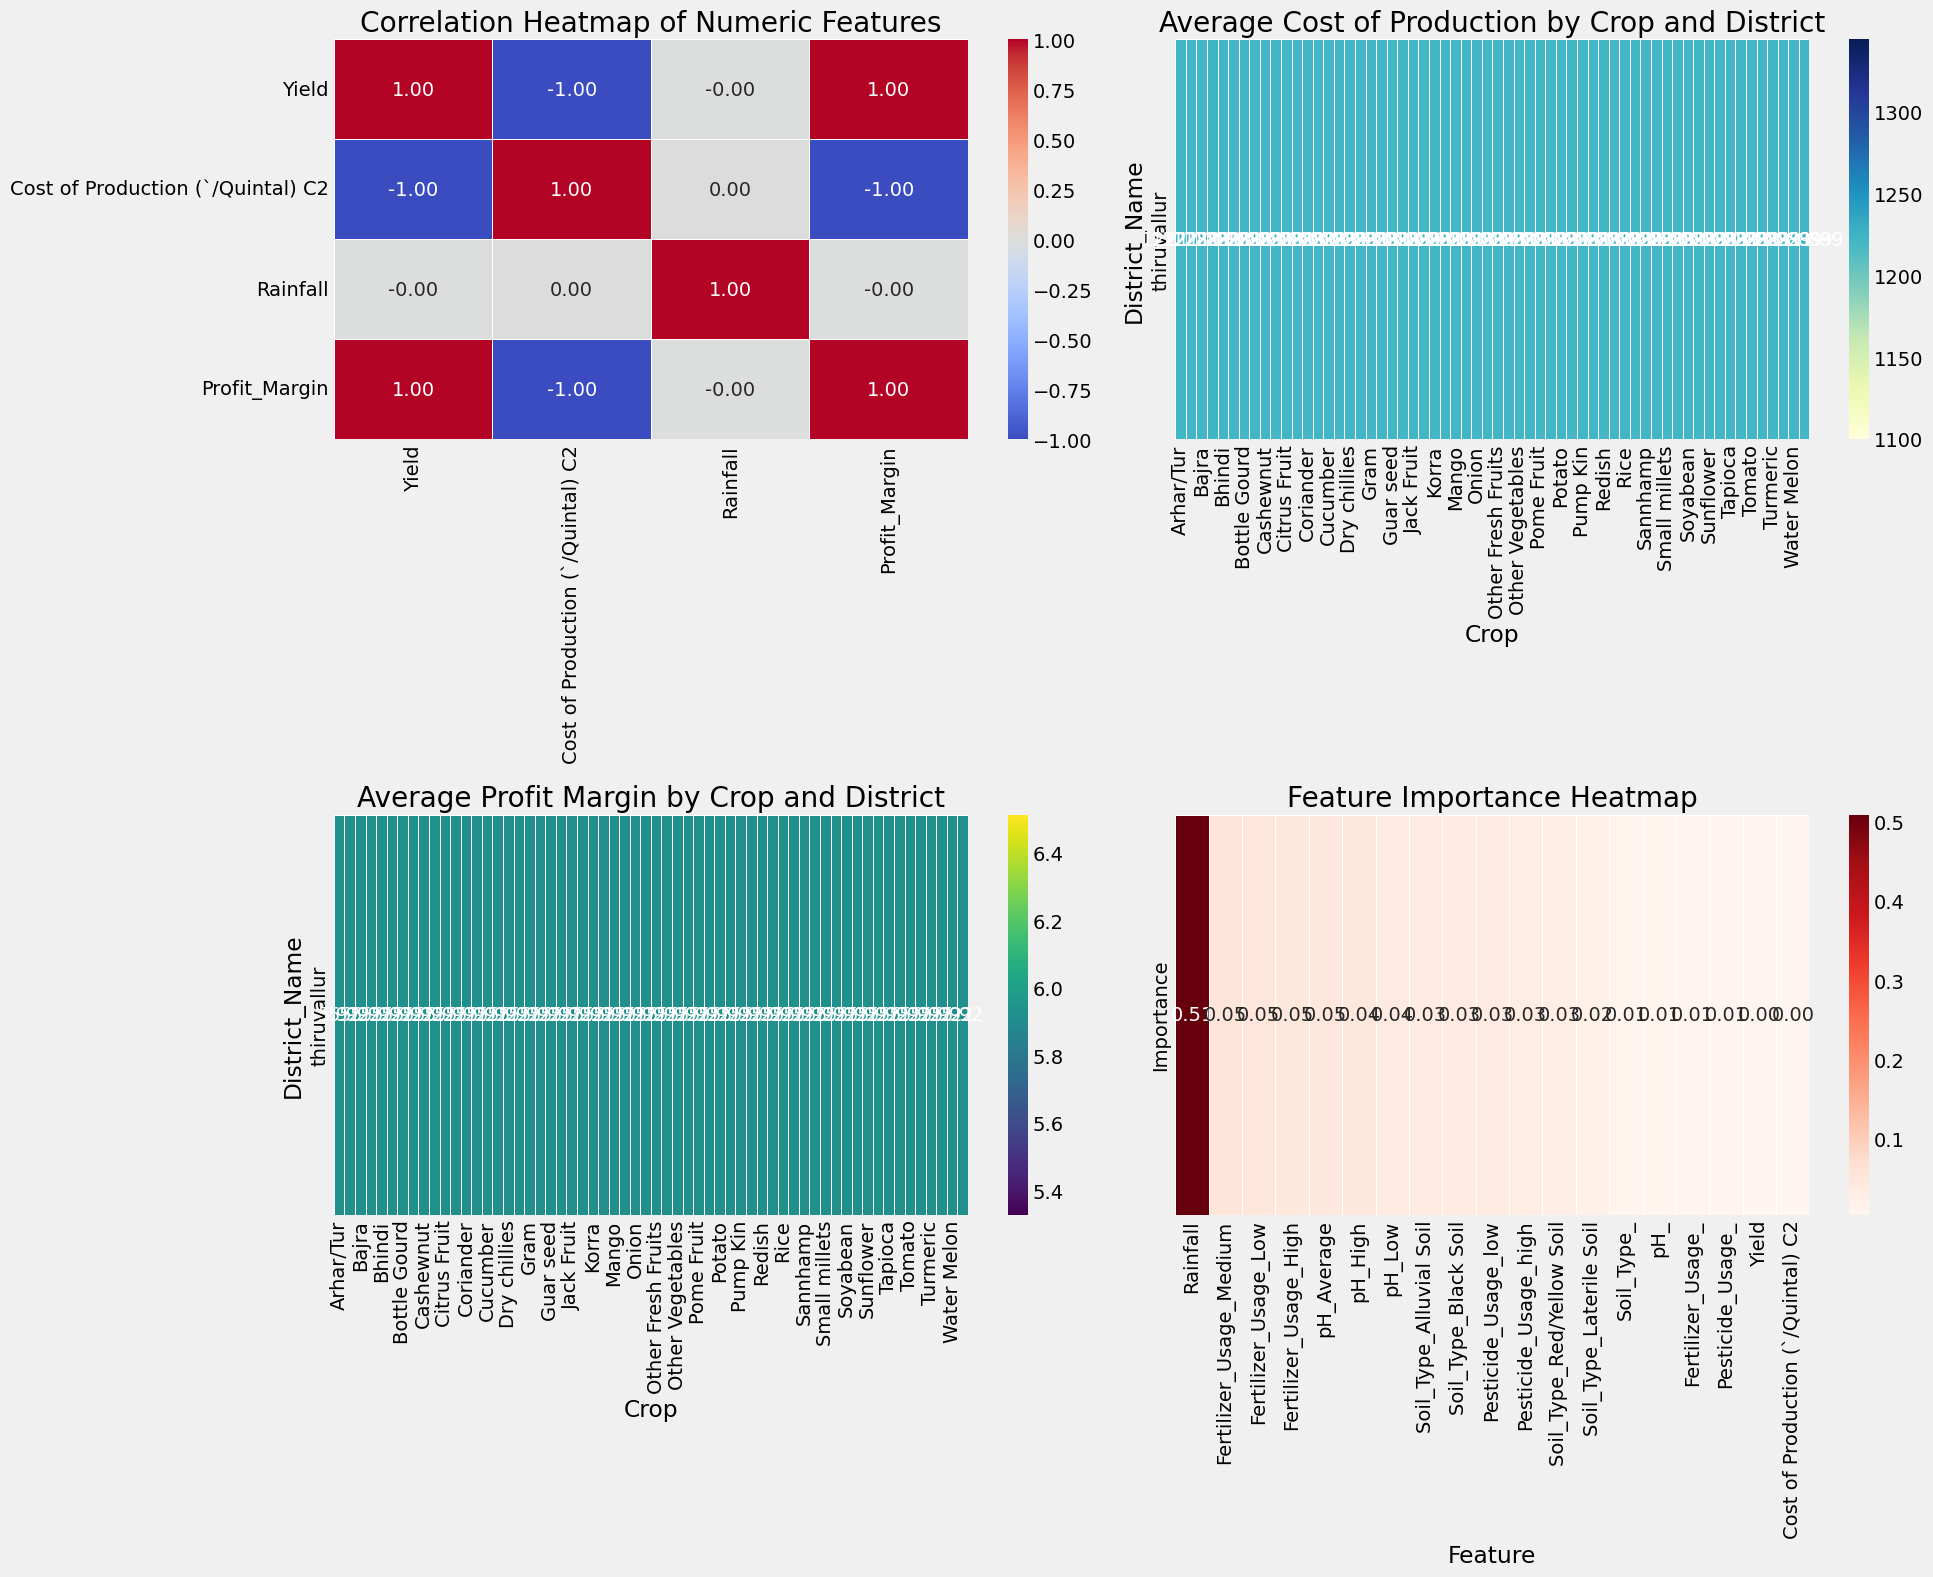

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define columns
numeric_columns = [
    'Yield',
    'Cost of Production (`/Quintal) C2',
    'Rainfall'
]
categorical_columns = [
    'Fertilizer_Usage',
    'Soil_Type',
    'Pesticide_Usage',
    'pH'
]

# Ensure numeric data types for relevant columns
for col in numeric_columns:
    filtered_data[col] = pd.to_numeric(filtered_data[col], errors='coerce')

# Handle zero division
filtered_data['Profit_Margin'] = np.divide(
    filtered_data['Yield'],
    filtered_data['Cost of Production (`/Quintal) C2'],
    out=np.zeros_like(filtered_data['Yield']),
    where=filtered_data['Cost of Production (`/Quintal) C2'] != 0
)

# Prepare data for machine learning
X = filtered_data[numeric_columns + categorical_columns]
y = filtered_data['Crop']

# Impute missing values for numeric columns
numeric_transformer = SimpleImputer(strategy='mean')

# Encode categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
model.fit(X_train, y_train)

# Extract feature importances
importances = model.named_steps['classifier'].feature_importances_

# Extract feature names for the transformed dataset
categorical_feature_names = preprocessor.named_transformers_['cat'] \
    .named_steps['onehot'] \
    .get_feature_names_out(categorical_columns)
feature_names = numeric_columns + list(categorical_feature_names)

# Create DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Define the plots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Correlation Heatmap
correlation_matrix = filtered_data[numeric_columns + ['Profit_Margin']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0, 0])
axes[0, 0].set_title('Correlation Heatmap of Numeric Features')

# 2. Average Cost of Production Heatmap
heatmap_data = filtered_data.pivot_table(
    values='Cost of Production (`/Quintal) C2',
    index='District_Name',
    columns='Crop',
    aggfunc='mean'
)
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5, ax=axes[0, 1])
axes[0, 1].set_title('Average Cost of Production by Crop and District')

# 3. Average Profit Margin Heatmap
profit_margin_data = filtered_data.pivot_table(
    values='Profit_Margin',
    index='District_Name',
    columns='Crop',
    aggfunc='mean'
)
sns.heatmap(profit_margin_data, cmap='viridis', annot=True, fmt='.2f', linewidths=0.5, ax=axes[1, 0])
axes[1, 0].set_title('Average Profit Margin by Crop and District')

# 4. Feature Importance Heatmap
heatmap_data = importance_df.set_index('Feature').T
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt='.2f', linewidths=0.5, ax=axes[1, 1])
axes[1, 1].set_title('Feature Importance Heatmap')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


**GEOGRAPHICAL ANALYSIS USING GEOPY:**


*   Nomatism
*   Geo_Eliptical_Analysis



**DISTRICTS WHICH ARE WITHIN THE RANGE OF 10KM RADIUS**



In [ ]:
!pip install geopy

from geopy.geocoders import Nominatim
from geopy.distance import geodesic
import time

def get_nearby_districts(district_name, distance_km=20):
    geolocator = Nominatim(user_agent="district_finder")
    location = geolocator.geocode(district_name)

    if location is None:
        print(f"Could not find location for {district_name}")
        return [], 0

    nearby_districts = []
    for _, row in data1.iterrows():
        district = row['District_Name']
        try:
            district_location = geolocator.geocode(district)
            time.sleep(1)  # Add a delay to avoid hitting rate limits
            if district_location is not None:
                distance = geodesic(location.point, district_location.point).km
                if distance <= distance_km:
                    nearby_districts.append(district)
        except Exception as e:
            print(f"Error finding location for {district}: {e}")

    return nearby_districts, len(nearby_districts)

# Example usage
district_name = "Thiruvallur"  # Replace with the desired district
nearby_districts, count = get_nearby_districts(district_name)

print(f"Number of districts within 20km of {district_name}: {count}")
print("Districts:")
for district in nearby_districts:
    print(district)


In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
from time import sleep


In [ ]:
geolocator = Nominatim(user_agent="Mozilla/5.0")

def get_coordinates(state, district):
    try:
        location = geolocator.geocode(f"{district}, {state}, India")
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except:
        return None, None


In [ ]:
state_district_data = {
    "Uttar Pradesh": [
        "AGRA",
        "ALIGARH",
        "ALLAHABAD",
        "AMBEDKAR NAGAR",
        "AMETHI",
        "AMROHA",
        "AURAIYA",
        "AZAMGARH",
        "BAGHPAT",
        "BAHRAICH",
        "BALLIA",
        "BALRAMPUR",
        "BANDA",
        "BARABANKI",
        "BAREILLY",
        "BASTI",
        "BIJNOR",
        "BUDAUN",
        "BULANDSHAHR",
        "CHANDAULI",
        "CHITRAKOOT",
        "DEORIA",
        "ETAH",
        "ETAWAH",
        "FAIZABAD",
        "FARRUKHABAD",
        "FATEHPUR",
        "FIROZABAD",
        "GAUTAM BUDDHA NAGAR",
        "GHAZIABAD",
        "GHAZIPUR",
        "GONDA",
        "GORAKHPUR",
        "HAMIRPUR",
        "HAPUR",
        "HARDOI",
        "HATHRAS",
        "JALAUN",
        "JAUNPUR",
        "JHANSI",
        "KANNAUJ",
        "KANPUR DEHAT",
        "KANPUR NAGAR",
        "KASGANJ",
        "KAUSHAMBI",
        "KHERI",
        "KUSHI NAGAR",
        "LALITPUR",
        "LUCKNOW",
        "MAHARAJGANJ",
        "MAHOBA",
        "MAINPURI",
        "MATHURA",
        "MAU",
        "MEERUT",
        "MIRZAPUR",
        "MORADABAD",
        "MUZAFFARNAGAR",
        "PILIBHIT",
        "PRATAPGARH",
        "RAE BARELI",
        "RAMPUR",
        "SAHARANPUR",
        "SAMBHAL",
        "SANT KABEER NAGAR",
        "SANT RAVIDAS NAGAR",
        "SHAHJAHANPUR",
        "SHAMLI",
        "SHRAVASTI",
        "SIDDHARTH NAGAR",
        "SITAPUR",
        "SONBHADRA",
        "SULTANPUR",
        "UNNAO",
        "VARANASI"
    ],
    "Karnataka": [
        "BAGALKOT",
        "BANGALORE RURAL",
        "BELGAUM",
        "BELLARY",
        "BENGALURU URBAN",
        "BIDAR",
        "BIJAPUR",
        "CHAMARAJANAGAR",
        "CHIKBALLAPUR",
        "CHIKMAGALUR",
        "CHITRADURGA",
        "DAKSHIN KANNAD",
        "DAVANGERE",
        "DHARWAD",
        "GADAG",
        "GULBARGA",
        "HASSAN",
        "HAVERI",
        "KODAGU",
        "KOLAR",
        "KOPPAL",
        "MANDYA",
        "MYSORE",
        "RAICHUR",
        "RAMANAGARA",
        "SHIMOGA",
        "TUMKUR",
        "UDUPI",
        "UTTAR KANNAD",
        "YADGIR"
    ],
    "Gujarat": [
        "AHMADABAD",
        "AMRELI",
        "ANAND",
        "BANAS KANTHA",
        "BHARUCH",
        "BHAVNAGAR",
        "DANG",
        "DOHAD",
        "GANDHINAGAR",
        "JAMNAGAR",
        "JUNAGADH",
        "KACHCHH",
        "KHEDA",
        "MAHESANA",
        "NARMADA",
        "NAVSARI",
        "PANCH MAHALS",
        "PATAN",
        "PORBANDAR",
        "RAJKOT",
        "SABAR KANTHA",
        "SURAT",
        "SURENDRANAGAR",
        "TAPI",
        "VADODARA",
        "VALSAD"
    ],
    "Andhra Pradesh": [
        "ANANTAPUR",
        "CHITTOOR",
        "EAST GODAVARI",
        "GUNTUR",
        "KADAPA",
        "KRISHNA",
        "KURNOOL",
        "PRAKASAM",
        "SPSR NELLORE",
        "SRIKAKULAM",
        "VISAKHAPATANAM",
        "VIZIANAGARAM",
        "WEST GODAVARI"
    ],
    "Maharashtra": [
        "AHMEDNAGAR",
        "AKOLA",
        "AMRAVATI",
        "AURANGABAD",
        "BEED",
        "BHANDARA",
        "BULDHANA",
        "CHANDRAPUR",
        "DHULE",
        "GADCHIROLI",
        "GONDIA",
        "HINGOLI",
        "JALGAON",
        "JALNA",
        "KOLHAPUR",
        "LATUR",
        "MUMBAI",
        "NAGPUR",
        "NANDED",
        "NANDURBAR",
        "NASHIK",
        "OSMANABAD",
        "PALGHAR",
        "PARBHANI",
        "PUNE",
        "RAIGAD",
        "RATNAGIRI",
        "SANGLI",
        "SATARA",
        "SINDHUDURG",
        "SOLAPUR",
        "THANE",
        "WARDHA",
        "WASHIM",
        "YAVATMAL"
    ],
    "Punjab": [
        "AMRITSAR",
        "BARNALA",
        "BATHINDA",
        "FARIDKOT",
        "FATEHGARH SAHIB",
        "FAZILKA",
        "FIROZEPUR",
        "GURDASPUR",
        "HOSHIARPUR",
        "JALANDHAR",
        "KAPURTHALA",
        "LUDHIANA",
        "MANSA",
        "MOGA",
        "MUKTSAR",
        "NAWANSHAHR",
        "PATHANKOT",
        "PATIALA",
        "RUPNAGAR",
        "S.A.S NAGAR",
        "SANGRUR",
        "TARN TARAN"
    ],
    "Haryana": [
        "AMBALA",
        "BHIWANI",
        "FARIDABAD",
        "FATEHABAD",
        "GURGAON",
        "HISAR",
        "JHAJJAR",
        "JIND",
        "KAITHAL",
        "KARNAL",
        "KURUKSHETRA",
        "MAHENDRAGARH",
        "MEWAT",
        "PALWAL",
        "PANCHKULA",
        "PANIPAT",
        "REWARI",
        "ROHTAK",
        "SIRSA",
        "SONIPAT",
        "YAMUNANAGAR"
    ],
    "Rajasthan": [
        "AJMER",
        "ALWAR",
        "BANSWARA",
        "BARAN",
        "BARMER",
        "BHARATPUR",
        "BHILWARA",
        "BIKANER",
        "BUNDI",
        "CHITTORGARH",
        "CHURU",
        "DAUSA",
        "DHOLPUR",
        "DUNGARPUR",
        "GANGANAGAR",
        "HANUMANGARH",
        "JAIPUR",
        "JAISALMER",
        "JALORE",
        "JHALAWAR",
        "JHUNJHUNU",
        "JODHPUR",
        "KARAULI",
        "KOTA",
        "NAGAUR",
        "PALI",
        "PRATAPGARH",
        "RAJSAMAND",
        "SAWAI MADHOPUR",
        "SIKAR",
        "SIROHI",
        "TONK",
        "UDAIPUR"
    ],
    "Madhya Pradesh": [
        "AGAR MALWA",
        "ALIRAJPUR",
        "ANUPPUR",
        "ASHOKNAGAR",
        "BALAGHAT",
        "BARWANI",
        "BETUL",
        "BHIND",
        "BHOPAL",
        "BURHANPUR",
        "CHHATARPUR",
        "CHHINDWARA",
        "DAMOH",
        "DATIA",
        "DEWAS",
        "DHAR",
        "DINDORI",
        "GUNA",
        "GWALIOR",
        "HARDA",
        "HOSHANGABAD",
        "INDORE",
        "JABALPUR",
        "JHABUA",
        "KATNI",
        "KHANDWA",
        "KHARGONE",
        "MANDLA",
        "MANDSAUR",
        "MORENA",
        "NARSINGHPUR",
        "NEEMUCH",
        "PANNA",
        "RAISEN",
        "RAJGARH",
        "RATLAM",
        "REWA",
        "SAGAR",
        "SATNA",
        "SEHORE",
        "SEONI",
        "SHAHDOL",
        "SHAJAPUR",
        "SHEOPUR",
        "SHIVPURI",
        "SIDHI",
        "SINGRAULI",
        "TIKAMGARH",
        "UJJAIN",
        "UMARIA",
        "VIDISHA"
    ],
    "Tamil Nadu": [
        "ARIYALUR",
        "COIMBATORE",
        "CUDDALORE",
        "DHARMAPURI",
        "DINDIGUL",
        "ERODE",
        "KANCHIPURAM",
        "KANNIYAKUMARI",
        "KARUR",
        "KRISHNAGIRI",
        "MADURAI",
        "NAGAPATTINAM",
        "NAMAKKAL",
        "PERAMBALUR",
        "PUDUKKOTTAI",
        "RAMANATHAPURAM",
        "SALEM",
        "SIVAGANGA",
        "THANJAVUR",
        "THE NILGIRIS",
        "THENI",
        "THIRUVALLUR",
        "THIRUVARUR",
        "TIRUCHIRAPPALLI",
        "TIRUNELVELI",
        "TIRUPPUR",
        "TIRUVANNAMALAI",
        "TUTICORIN",
        "VELLORE",
        "VILLUPURAM",
        "VIRUDHUNAGAR"
    ],
    "Bihar": [
        "ARARIA",
        "ARWAL",
        "AURANGABAD",
        "BANKA",
        "BEGUSARAI",
        "BHAGALPUR",
        "BHOJPUR",
        "BUXAR",
        "DARBHANGA",
        "GAYA",
        "GOPALGANJ",
        "JAMUI",
        "JEHANABAD",
        "KAIMUR (BHABUA)",
        "KATIHAR",
        "KHAGARIA",
        "KISHANGANJ",
        "LAKHISARAI",
        "MADHEPURA",
        "MADHUBANI",
        "MUNGER",
        "MUZAFFARPUR",
        "NALANDA",
        "NAWADA",
        "PASHCHIM CHAMPARAN",
        "PATNA",
        "PURBI CHAMPARAN",
        "PURNIA",
        "ROHTAS",
        "SAHARSA",
        "SAMASTIPUR",
        "SARAN",
        "SHEIKHPURA",
        "SHEOHAR",
        "SITAMARHI",
        "SIWAN",
        "SUPAUL",
        "VAISHALI"
    ],
    "Orissa": [
        ""
    ],
    "West Bengal": [
        "24 PARAGANAS NORTH",
        "24 PARAGANAS SOUTH",
        "BANKURA",
        "BARDHAMAN",
        "BIRBHUM",
        "COOCHBEHAR",
        "DARJEELING",
        "DINAJPUR DAKSHIN",
        "DINAJPUR UTTAR",
        "HOOGHLY",
        "HOWRAH",
        "JALPAIGURI",
        "MALDAH",
        "MEDINIPUR EAST",
        "MEDINIPUR WEST",
        "MURSHIDABAD",
        "NADIA",
        "PURULIA"
    ]
}


In [ ]:
district_coordinates = {}

for state, districts in state_district_data.items():
    for district in districts:
        sleep(1)  # Add delay to avoid hitting the geolocation service too quickly
        lat, lon = get_coordinates(state, district)
        district_coordinates[f"{state}-{district}"] = (lat, lon)


In [ ]:
def calculate_distance(given_coords, lat, lon):
    try:
        if lat and lon:
            return geodesic(given_coords, (lat, lon)).kilometers
        else:
            return None
    except:
        return None

def find_nearby_districts(state_name, district_name, radius=20):
    key = f"{state_name}-{district_name}"
    given_coords = district_coordinates.get(key)

    if not given_coords or None in given_coords:
        return f"Coordinates not found for {district_name}, {state_name}"

    nearby_districts = []

    for district_key, coords in district_coordinates.items():
        if district_key != key and None not in coords:
            distance = calculate_distance(given_coords, coords[0], coords[1])
            if distance and distance <= radius:
                nearby_districts.append(district_key)

    return nearby_districts

# Example usage:
state_name = "BIHAR"
district_name = "NALANDA"
nearby_districts = find_nearby_districts(state_name, district_name)
print(nearby_districts)


Coordinates not found for NALANDA, BIHAR


In [ ]:
from geopy.distance import geodesic

# Assuming this is your dictionary structure
district_coordinates = {
    "BIHAR-NALANDA": (25.1357, 85.4438),
    # Add other districts here
}

def calculate_distance(given_coords, lat, lon):
    try:
        if lat is not None and lon is not None:
            return geodesic(given_coords, (lat, lon)).kilometers
        else:
            return None
    except:
        return None

def find_nearby_districts(state_name, district_name, radius=100):
    key = f"{state_name}-{district_name}"
    given_coords = district_coordinates.get(key)

    if not given_coords or None in given_coords:
        return f"Coordinates not found for {district_name}, {state_name}"

    nearby_districts = []

    for district_key, coords in district_coordinates.items():
        if district_key != key and None not in coords:
            distance = calculate_distance(given_coords, coords[0], coords[1])
            if distance and distance <= radius:
                nearby_districts.append(district_key)

    return nearby_districts

# Example usage:
state_name = "BIHAR"
district_name = "NALANDA"
nearby_districts = find_nearby_districts(state_name, district_name)
print(nearby_districts)


[]


In [ ]:
from geopy.distance import geodesic
import pandas as pd

# Example district coordinates (replace with your actual data)
district_coordinates = {
    "NALANDA-BIHAR": (25.1357, 85.4438),
    "PATNA-BIHAR": (25.6022, 85.1234),
    "GAYA-BIHAR": (24.7964, 84.9780),
    "MUZAFFARPUR-BIHAR": (26.1208, 85.3794),
    # Add more districts here
}

def calculate_distance(coord1, coord2):
    """Calculate the geodesic distance between two coordinates."""
    try:
        return geodesic(coord1, coord2).kilometers
    except Exception as e:
        print(f"Error calculating distance: {e}")
        return None

def find_nearby_districts(district_name, radius=20):
    """Find districts within a certain radius from the given district."""
    key = f"{district_name}-BIHAR"
    given_coords = district_coordinates.get(key)

    if not given_coords:
        return f"Coordinates not found for {district_name}, BIHAR"

    nearby_districts = []

    for district_key, coords in district_coordinates.items():
        if district_key != key:
            distance = calculate_distance(given_coords, coords)
            if distance and distance <= radius:
                nearby_districts.append((district_key, distance))

    # Sort nearby districts by distance
    nearby_districts.sort(key=lambda x: x[1])

    return nearby_districts

# Example usage
district_name = "NALANDA"
nearby_districts = find_nearby_districts(district_name)

# Display results
if isinstance(nearby_districts, str):
    print(nearby_districts)
else:
    for district, dist in nearby_districts:
        print(f"{district} is {dist:.2f} km away.")


In [ ]:
from geopy.distance import geodesic

# Example district coordinates (replace with your actual data)
district_coordinates = {
    "NALANDA-BIHAR": (25.1357, 85.4438),
    "PATNA-BIHAR": (25.6022, 85.1234),
    "GAYA-BIHAR": (24.7964, 84.9780),
    "MUZAFFARPUR-BIHAR": (26.1208, 85.3794),
    # Add more districts here
}

def calculate_distance(coord1, coord2):
    """Calculate the geodesic distance between two coordinates."""
    try:
        return geodesic(coord1, coord2).kilometers
    except Exception as e:
        print(f"Error calculating distance: {e}")
        return None

def find_nearby_districts(district_name, radius=20):
    """Find districts within a certain radius from the given district."""
    key = f"{district_name}-BIHAR"
    given_coords = district_coordinates.get(key)

    if not given_coords:
        return f"Coordinates not found for {district_name}, BIHAR"

    print(f"Given coordinates for {district_name}: {given_coords}")  # Debugging print

    nearby_districts = []

    for district_key, coords in district_coordinates.items():
        if district_key != key:
            distance = calculate_distance(given_coords, coords)
            print(f"Checking distance to {district_key}: {distance}")  # Debugging print
            if distance is not None and distance <= radius:
                nearby_districts.append((district_key, distance))

    # Sort nearby districts by distance
    nearby_districts.sort(key=lambda x: x[1])

    return nearby_districts if nearby_districts else f"No nearby districts within {radius} km."

# Example usage
district_name = "NALANDA"
nearby_districts = find_nearby_districts(district_name)

# Display results
if isinstance(nearby_districts, str):
    print(nearby_districts)
else:
    for district, dist in nearby_districts:
        print(f"{district} is {dist:.2f} km away.")


Given coordinates for NALANDA: (25.1357, 85.4438)
Checking distance to PATNA-BIHAR: 60.913856255248895
Checking distance to GAYA-BIHAR: 60.20763723236908
Checking distance to MUZAFFARPUR-BIHAR: 109.32316768343077
No nearby districts within 20 km.


TRAINNING AND TESTING MODEL WITH ADVANCED ML ALGORITHMS

In [37]:
import pandas as pd
from difflib import get_close_matches
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

def filter_data_by_region(data):
    """
    Filter data for a specific state and district (case-insensitive) and provide summary statistics.
    This version includes advanced techniques such as fuzzy matching and a predictive model.
    """
    # Get user input for state and district names
    state_name_input = input("Enter the state name: ").strip().lower()
    district_name_input = input("Enter the district name: ").strip().lower()

    # Convert State_Name and District_Name columns to lower case and fill NaNs with empty strings
    data['State_Name'] = data['State_Name'].astype(str).str.lower().fillna('')
    data['District_Name'] = data['District_Name'].astype(str).str.lower().fillna('')

    # Use fuzzy matching to find closest matches for state and district names
    state_name = get_close_matches(state_name_input, data['State_Name'].unique(), n=1, cutoff=0.6)
    district_name = get_close_matches(district_name_input, data['District_Name'].unique(), n=1, cutoff=0.6)

    if not state_name or not district_name:
        print(f"No close matches found for State: {state_name_input.title()} or District: {district_name_input.title()}.")
        return None

    # Filter data for the specific state and district
    filter_data = data[(data['State_Name'] == state_name[0]) & (data['District_Name'] == district_name[0])]

    if filter_data.empty:
        print(f"No data available for State: {state_name[0].title()} and District: {district_name[0].title()}.")
        return None

    print(f"Data available for State: {state_name[0].title()} and District: {district_name[0].title()}.")

    # Handle missing data by separating numeric and non-numeric columns
    numeric_cols = filter_data.select_dtypes(include=[np.number]).columns
    non_numeric_cols = filter_data.select_dtypes(exclude=[np.number]).columns

    # Fill NaN in numeric columns with the median
    filter_data[numeric_cols] = filter_data[numeric_cols].apply(lambda x: x.fillna(x.median()))

    # Fill NaN in non-numeric columns with the most frequent value (mode)
    for col in non_numeric_cols:
        if filter_data[col].isnull().any():
            mode_val = filter_data[col].mode()[0]  # Get the most frequent value
            filter_data[col] = filter_data[col].fillna(mode_val)

    # Store original State_Name and District_Name columns to use after encoding
    original_state_name = filter_data['State_Name']
    original_district_name = filter_data['District_Name']

    # Encoding categorical data (if any) before model training
    filter_data = pd.get_dummies(filter_data, drop_first=True)

    # Add original state and district name columns back after encoding
    filter_data['State_Name'] = original_state_name
    filter_data['District_Name'] = original_district_name

    # Display summary statistics for the filtered data
    print("\nSummary Statistics:")
    print(filter_data.describe(include='all'))

    # Advanced: Train a predictive model to forecast yield based on selected features
    # Selecting numeric features only and ensuring no object-type columns are included
    features = ['Cost of Cultivation (`/Hectare) A2+FL', 'Cost of Cultivation (`/Hectare) C2',
                'Cost of Production (`/Quintal) C2', 'Rainfall', 'pH']  # Example features, adjust as needed
    target = 'Yield'

    # Ensure all feature columns are numeric and in the dataset
    features = [feature for feature in features if feature in filter_data.columns]

    if set(features).issubset(filter_data.columns) and target in filter_data.columns:
        X = filter_data[features]
        y = filter_data[target]

        # Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a Random Forest model
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Predict and evaluate the model
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        print(f"\nRandom Forest Model Mean Squared Error: {mse:.2f}")

        # Provide predictions for the user
        print("\nPredicted Yield based on input features:")
        filter_data['Predicted_Yield'] = model.predict(X[features])
        print(filter_data[['State_Name', 'District_Name', 'Predicted_Yield']].head())

    return filter_data

# Example usage: call the function to filter and analyze the data
filter_data = filter_data_by_region(data1)


Enter the state name: tamil nadu
Enter the district name: thiruvallur
Data available for State: Tamil Nadu and District: Thiruvallur.

Summary Statistics:
        Cost of Cultivation (`/Hectare) A2+FL  \
count                             3766.000000   
unique                                    NaN   
top                                       NaN   
freq                                      NaN   
mean                             44421.460000   
std                              21916.509979   
min                              22507.860000   
25%                              22507.860000   
50%                              44421.460000   
75%                              66335.060000   
max                              66335.060000   

        Cost of Cultivation (`/Hectare) C2  Cost of Production (`/Quintal) C2  \
count                          3766.000000                        3766.000000   
unique                                 NaN                                NaN   
top          

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

def recommend_crop(filter_data):
    """
    Recommends the most profitable crop using advanced machine learning techniques.
    """
    if filter_data is None:
        print("No data to recommend crops.")
        return

    # Verify if the 'Crop' column exists in the DataFrame
    if 'Crop' not in filter_data.columns:
        print("Target variable 'Crop' is missing in the data.")
        print("Available columns:", filter_data.columns)
        return

    # Ensure numeric data types for relevant columns
    numeric_columns = [
        'Predicted_Yield', 'Cost of Production (`/Quintal) C2',
        'Fertilizer_Usage_Low', 'Fertilizer_Usage_Medium',
        'Soil_Type_Black Soil', 'Soil_Type_Laterile Soil',
        'Soil_Type_Red/Yellow Soil', 'Pesticide_Usage_low',
        'Rainfall', 'pH_High', 'pH_Low'
    ]

    # Convert columns to numeric where possible, handling errors
    for col in numeric_columns:
        if col in filter_data.columns:
            filter_data[col] = pd.to_numeric(filter_data[col], errors='coerce')

    # Calculate profit margin (Ensure Cost of Production is non-zero)
    filter_data['Profit_Margin'] = np.divide(
        filter_data['Predicted_Yield'],
        filter_data['Cost of Production (`/Quintal) C2'] + 1e-9,  # Avoid division by zero
        out=np.zeros_like(filter_data['Predicted_Yield']),
        where=(filter_data['Cost of Production (`/Quintal) C2'] + 1e-9) != 0
    )

    # Handle missing values
    if filter_data['Profit_Margin'].isnull().all():
        print("Unable to calculate profit margin. Check for missing or invalid data in relevant columns.")
        return

    # Prepare data for machine learning
    features = [col for col in numeric_columns if col in filter_data.columns] + ['Profit_Margin']
    target = 'Crop'

    # Ensure target column is present
    if target not in filter_data.columns:
        print(f"Target variable '{target}' is missing in the data.")
        return

    X = filter_data[features]
    y = filter_data[target]

    # Impute missing values and scale features
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    X_transformed = pipeline.fit_transform(X)

    # Feature selection using RFE
    estimator = RandomForestClassifier(n_estimators=100, random_state=42)
    selector = RFE(estimator, n_features_to_select=10)  # Select top 10 features
    X_selected = selector.fit_transform(X_transformed, y)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # Hyperparameter tuning using Grid Search for Random Forest
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
    rf_model = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_rf_model = grid_search.best_estimator_

    # Train a Gradient Boosting model for ensemble
    gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

    # Create an ensemble model
    ensemble_model = VotingClassifier(
        estimators=[
            ('rf', best_rf_model),
            ('gb', gb_model)
        ],
        voting='soft'
    )
    ensemble_model.fit(X_train, y_train)

    # Predict the most profitable crop
    y_pred = ensemble_model.predict(X_test)

    # Evaluate the model's accuracy
    accuracy = accuracy_score(y_test, y_pred)
    most_common_crop = pd.Series(y_pred).mode()[0]  # Get the most common predicted crop

    print("\nRecommended Crop:")
    print(f"Crop: {most_common_crop}")
    print(f"Predicted Accuracy: {accuracy:.2f}")

    # Analyze minimum and maximum costs for the recommended crop
    crop_data = filter_data[filter_data['Crop'] == most_common_crop]
    min_cost = crop_data['Cost of Production (`/Quintal) C2'].min()
    max_cost = crop_data['Cost of Production (`/Quintal) C2'].max()

    print("\nCost Analysis for Recommended Crop:")
    print(f"Minimum Cost of Production: {min_cost:.2f}")
    print(f"Maximum Cost of Production: {max_cost:.2f}")

# Example usage:
# Assume `data1` is your DataFrame
filter_data = filter_data_by_region(data1)
recommend_crop(filter_data)


Enter the state name: tamil nadu
Enter the district name: thiruvallur
Data available for State: Tamil Nadu and District: Thiruvallur.

Summary Statistics:
        Cost of Cultivation (`/Hectare) A2+FL  \
count                             3766.000000   
unique                                    NaN   
top                                       NaN   
freq                                      NaN   
mean                             44421.460000   
std                              21916.509979   
min                              22507.860000   
25%                              22507.860000   
50%                              44421.460000   
75%                              66335.060000   
max                              66335.060000   

        Cost of Cultivation (`/Hectare) C2  Cost of Production (`/Quintal) C2  \
count                          3766.000000                        3766.000000   
unique                                 NaN                                NaN   
top          